In [1]:
# Importamos las librerías

%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

In [2]:
# Importamos el dataset

df = pd.read_csv('./data/data_limpio_gdf_caba.csv')

print(df.shape)
df.head()

(20542, 15)


,municipio,provincia,lat,lon,sup_m2_total,precio_usd,tipo,ambientes_cat,precio_usd_por_m2,tipo_cat_code,municipio_cat_code,provincia_cat_code,ambientes_cat_code,geometry,precio_usd_por_m2_cat
0,Mataderos,Capital Federal,-34.661824,-58.508839,40.0,62000.0,PH,1,1550.000000,0,194,5,1,POINT (-58.5088387 -34.6618237),2
1,Mataderos,Capital Federal,-34.652262,-58.522982,55.0,72000.0,apartment,2,1309.090909,1,194,5,2,POINT (-58.5229825 -34.6522615),2
2,Belgrano,Capital Federal,-34.559873,-58.443362,40.0,138000.0,apartment,1,3450.000000,1,25,5,1,POINT (-58.443362 -34.5598729),8
3,Belgrano,Capital Federal,-34.559873,-58.443362,60.0,195000.0,apartment,2,3250.000000,1,25,5,2,POINT (-58.443362 -34.5598729),8
4,Mataderos,Capital Federal,-34.652356,-58.501624,98.0,239000.0,PH,4 o mas,2438.775510,0,194,5,4,POINT (-58.5016239381 -34.6523561177),6


In [3]:
# Seleccionamos las columnas que vamos a utilizar y sólo las propiedades de tipo apartamento

df = df[df['tipo'] == 'apartment']
df = df[['municipio', 'sup_m2_total', 'ambientes_cat', 'lat', 'lon', 'precio_usd' ]]
df.head()

,municipio,sup_m2_total,ambientes_cat,lat,lon,precio_usd
1,Mataderos,55.0,2,-34.652262,-58.522982,72000.0
2,Belgrano,40.0,1,-34.559873,-58.443362,138000.0
3,Belgrano,60.0,2,-34.559873,-58.443362,195000.0
5,Palermo,96.0,3,-34.580504,-58.405874,350000.0
6,Palermo,73.0,4 o mas,-34.590926,-58.411665,270500.0


In [4]:
# Extraemos un dataframe por cada columna

df_sup_m2_total = df[['sup_m2_total', 'precio_usd', 'municipio']]
df_ambientes_cat = df[['ambientes_cat', 'precio_usd', 'municipio']]
df_ubica = df[['lat', 'lon', 'precio_usd', 'municipio']]

In [5]:
# Creamos las variables dummies para la variable categórica de ambientes

df_ambientes_cat = pd.get_dummies(df_ambientes_cat, columns=['ambientes_cat'], drop_first=True)
print(df_ambientes_cat.shape)
df_ambientes_cat.head()

(16989, 6)


,precio_usd,municipio,ambientes_cat_1,ambientes_cat_2,ambientes_cat_3,ambientes_cat_4 o mas
1,72000.0,Mataderos,0,1,0,0
2,138000.0,Belgrano,1,0,0,0
3,195000.0,Belgrano,0,1,0,0
5,350000.0,Palermo,0,0,1,0
6,270500.0,Palermo,0,0,0,1


In [6]:
# Armamos la función para las regresiones lineales

def regresion_lineal(df_lr, target, test_size=0.2, random_state=42):
    # Separamos la variable objetivo del resto del dataset
    X = df_lr.drop(target, axis=1)
    y = df_lr[target]
    
    # Dividimos el dataset en train y test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Normalizamos los datos
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Instanciamos el modelo
    model = linear_model.LinearRegression()
    
    # Entrenamos el modelo
    model.fit(X_train, y_train)
    
    # Predecimos con el modelo
    y_pred = model.predict(X_test)
    
    # Calculamos el R2
    r2 = r2_score(y_test, y_pred)
    
    # Imprimimos los resultados
    print('R2: ', r2)
    print('Intercept: ', model.intercept_)
    print('Coeficiente: ', model.coef_[0])
    
    # Graficamos los resultados
    plt.figure(figsize=(4, 3))
    plt.scatter(y_test, y_pred)
    plt.axline(xy1=(0, 0), slope=1, color='red')
    plt.xlabel('Valores reales')
    plt.ylabel('Valores predichos')
    plt.xlim(0, 1000000)
    plt.ylim(0, 1000000)
    plt.show()


In [7]:
# Creo un array con los municipios

municipios = df['municipio'].unique()

Municipio:  Belgrano
R2:  0.5310564244645148
Intercept:  307335.524837037
Coeficiente:  270684.75359655026


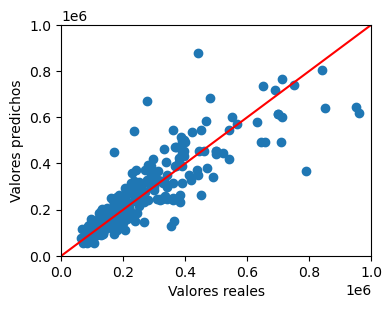

----------------------------------------
Municipio:  Palermo
R2:  0.7128372592227904
Intercept:  304054.0803683492
Coeficiente:  284623.63978949294


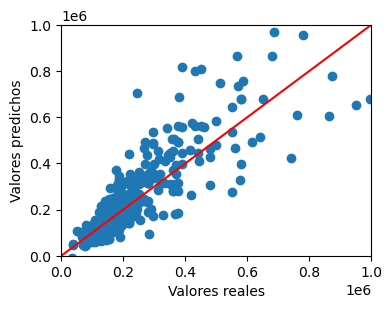

----------------------------------------
Municipio:  Flores
R2:  0.8703511432221771
Intercept:  142588.5500698324
Coeficiente:  71329.15446668229


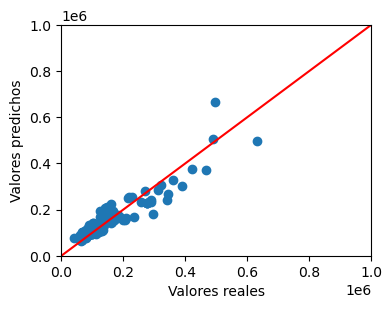

----------------------------------------
Municipio:  Boedo
R2:  -0.004457327234224762
Intercept:  317971.6030456853
Coeficiente:  -39834.59943676748


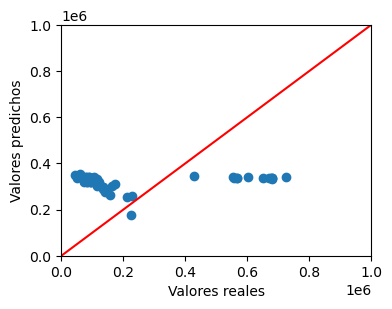

----------------------------------------
Municipio:  Balvanera
R2:  0.7490716020272796
Intercept:  129109.29648241206
Coeficiente:  46554.02896429532


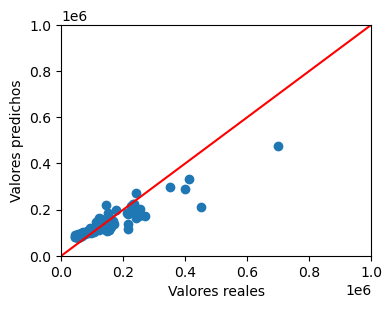

----------------------------------------
Municipio:  Caballito
R2:  0.2278468863302393
Intercept:  173708.97999203185
Coeficiente:  90761.94368091291


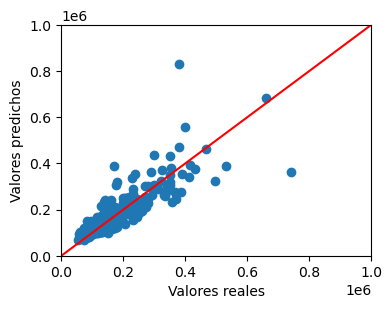

----------------------------------------
Municipio:  Nuñez
R2:  -1.2977174278051482
Intercept:  363163.3674220963
Coeficiente:  620030.9845190921


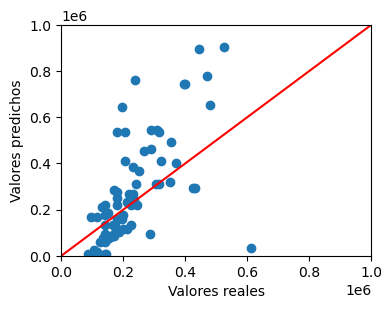

----------------------------------------
Municipio:  Barrio Norte
R2:  0.6660352413324293
Intercept:  299050.62093750003
Coeficiente:  233857.10713426064


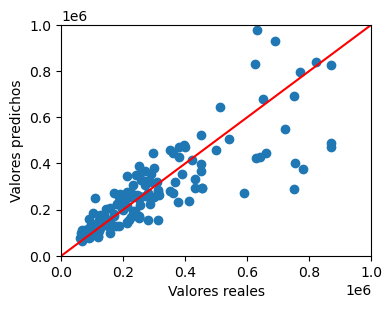

----------------------------------------
Municipio:  Recoleta
R2:  0.8188181528594273
Intercept:  414136.8682411504
Coeficiente:  318700.80660568306


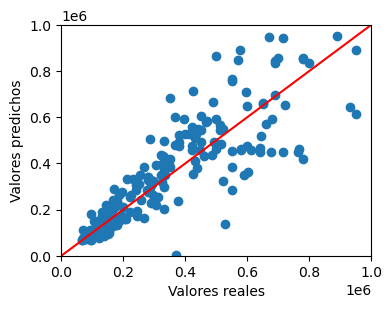

----------------------------------------
Municipio:  Villa Crespo
R2:  0.7983499395712398
Intercept:  145502.49117443865
Coeficiente:  67738.29051535134


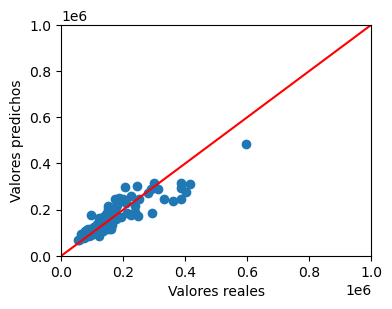

----------------------------------------
Municipio:  Puerto Madero
R2:  0.8581015221482347
Intercept:  901017.4940476189
Coeficiente:  606628.1398544867


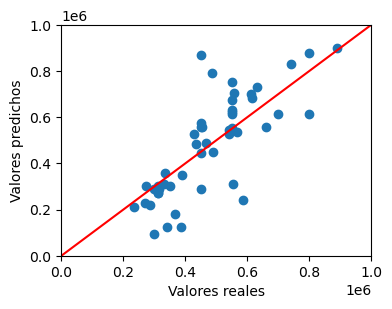

----------------------------------------
Municipio:  Constitución
R2:  0.8706271891074276
Intercept:  93359.52126984127
Coeficiente:  48477.08884041577


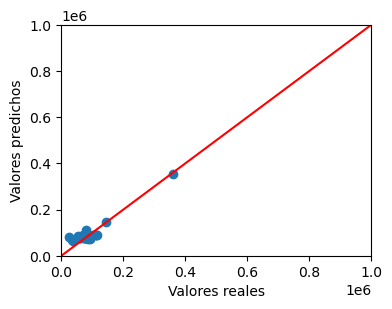

----------------------------------------
Municipio:  Colegiales
R2:  0.5753450362238782
Intercept:  162840.2219607843
Coeficiente:  63404.67532893959


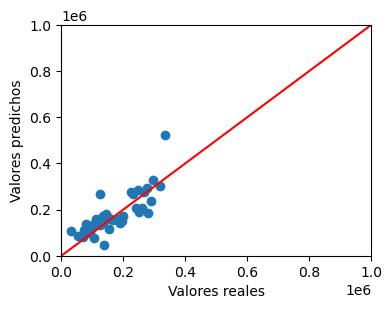

----------------------------------------
Municipio:  Villa Urquiza
R2:  -2.2421665524863106
Intercept:  147065.53854545456
Coeficiente:  70454.69954612186


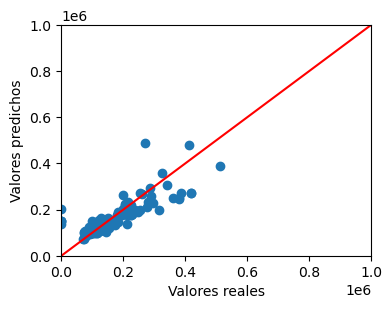

----------------------------------------
Municipio:  Saavedra
R2:  0.7447335337726155
Intercept:  171013.58635193133
Coeficiente:  54825.60784729733


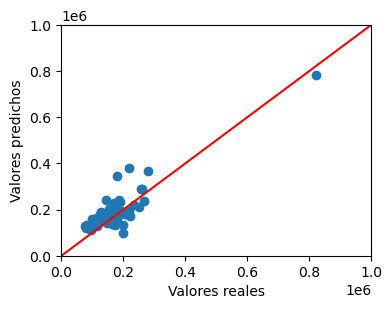

----------------------------------------
Municipio:  Barracas
R2:  -2.4503483000248143
Intercept:  171129.3726635514
Coeficiente:  79014.90275543305


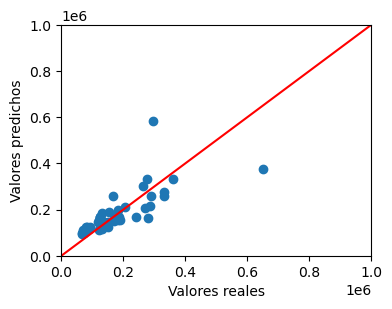

----------------------------------------
Municipio:  Coghlan
R2:  0.7352363454060837
Intercept:  147417.46836879433
Coeficiente:  52459.232807314234


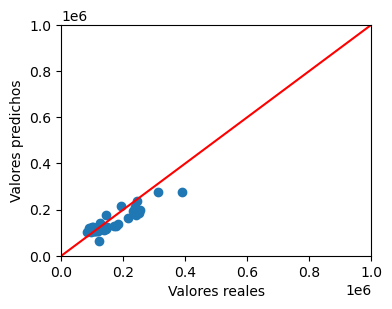

----------------------------------------
Municipio:  Almagro
R2:  0.3727790147910478
Intercept:  153083.19327419356
Coeficiente:  53676.77730548512


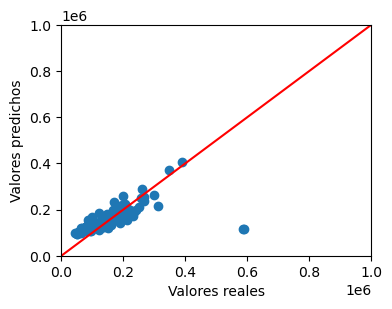

----------------------------------------
Municipio:  San Telmo
R2:  0.3819727890787583
Intercept:  128964.21185546875
Coeficiente:  94486.63091761299


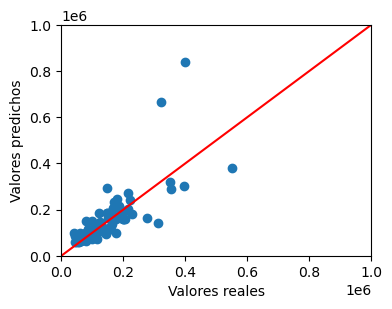

----------------------------------------
Municipio:  Monserrat
R2:  0.626845556730167
Intercept:  123626.3233707865
Coeficiente:  61153.73802690527


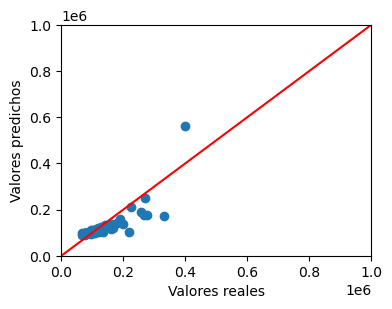

----------------------------------------
Municipio:  Villa Devoto
R2:  0.8887233357701214
Intercept:  167758.56095238097
Coeficiente:  98772.87898741299


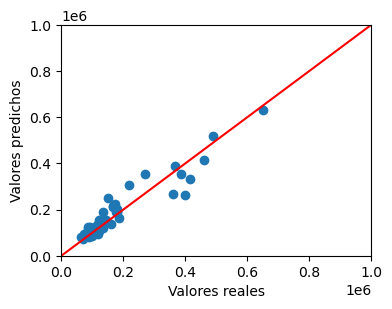

----------------------------------------
Municipio:  San Cristobal
R2:  0.26026847263624164
Intercept:  145523.34943877553
Coeficiente:  33608.1731021339


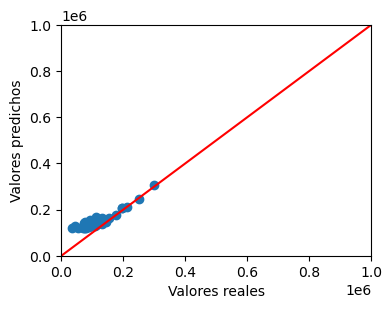

----------------------------------------
Municipio:  Floresta
R2:  0.5703047439508895
Intercept:  118594.8431372549
Coeficiente:  46202.36537557594


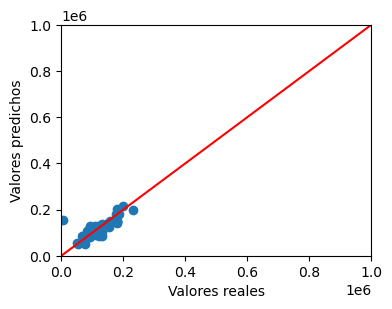

----------------------------------------
Municipio:  Retiro
R2:  0.8808920335074707
Intercept:  324644.1341791045
Coeficiente:  275597.85336801794


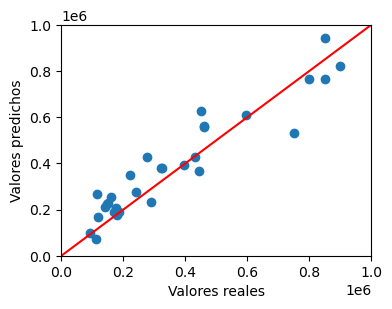

----------------------------------------
Municipio:  San Nicolás
R2:  0.6703538679404857
Intercept:  146257.4642857143
Coeficiente:  65832.34364042636


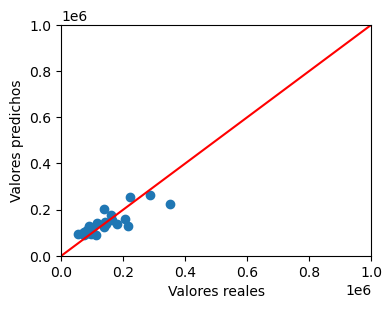

----------------------------------------
Municipio:  Chacarita
R2:  0.029735445606206112
Intercept:  121846.86
Coeficiente:  53761.02484628269


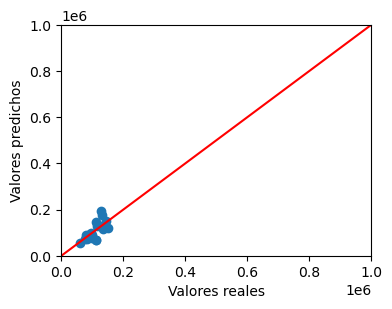

----------------------------------------
Municipio:  Congreso
R2:  0.2049340277486411
Intercept:  142427.86401197605
Coeficiente:  47645.206931289256


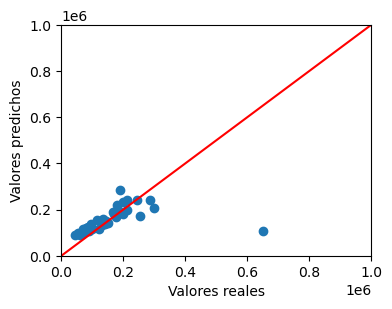

----------------------------------------
Municipio:  Villa del Parque
R2:  0.5570101573333813
Intercept:  138848.19047619047
Coeficiente:  52945.12281423467


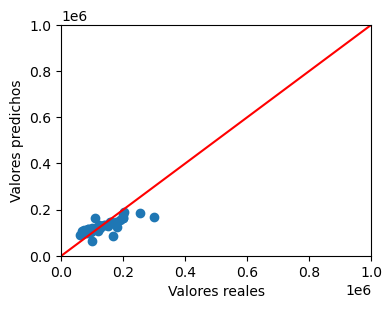

----------------------------------------
Municipio:  Liniers
R2:  -0.12705619836637716
Intercept:  134685.59678899084
Coeficiente:  37973.99658964523


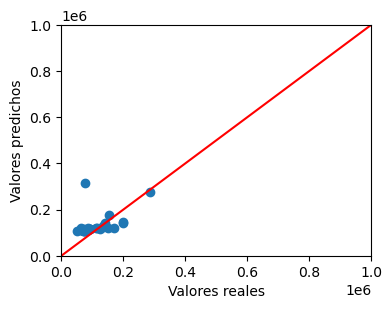

----------------------------------------
Municipio:  Parque Patricios
R2:  -0.010829153472069919
Intercept:  125164.59848484848
Coeficiente:  -6375.170819937799


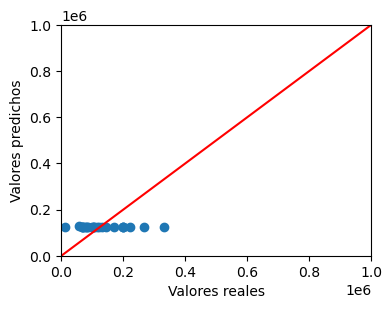

----------------------------------------
Municipio:  Once
R2:  0.8693617582659409
Intercept:  120821.2330927835
Coeficiente:  49937.72333595424


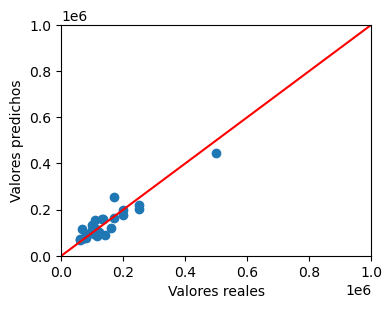

----------------------------------------
Municipio:  Villa Luro
R2:  0.7367668455534909
Intercept:  129721.45418367349
Coeficiente:  42046.04285526637


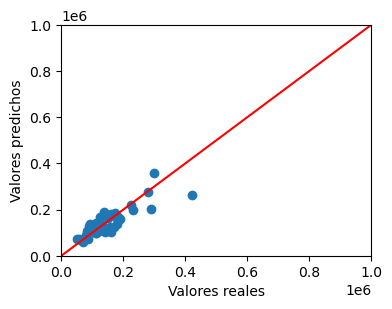

----------------------------------------


In [8]:
# Regresión lineal para el precio de las propiedades en función del municipio y la superficie total y guardamos el modelo en un mapa

for municipio in municipios:
    df_municipio = df_sup_m2_total[df_sup_m2_total['municipio'] == municipio]
    if(df_municipio.shape[0] > 100):
        df_municipio = df_municipio.drop('municipio', axis=1)
        print('Municipio: ', municipio)
        regresion_lineal(df_municipio, 'precio_usd')
        print('----------------------------------------')


In [9]:
# def sum_mod(model, X):
#     a = pd.DataFrame(model.coef_ , X.columns.values)
#     a = a.append(pd.DataFrame([model.intercept_, model.score(X, y)], index=['Intecept','R2']))
#     return(a)